In [25]:
from collections import deque
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance
import re

In [2]:
def readinput(filename):
    out = []
    with open(filename, "r") as fh:
        data = None
        for line in fh:
            line = line.strip()
            if re.match("^---", line):
                if data is not None:
                    out.append(np.array(data, dtype=int))
                data = []
            elif line != "":
                x, y, z = [int(x) for x in line.split(",")]
                data.append([x, y, z])
    out.append(np.array(data, dtype=int))
    return out

test = readinput("test.txt")
test[0]

array([[ 404, -588, -901],
       [ 528, -643,  409],
       [-838,  591,  734],
       [ 390, -675, -793],
       [-537, -823, -458],
       [-485, -357,  347],
       [-345, -311,  381],
       [-661, -816, -575],
       [-876,  649,  763],
       [-618, -824, -621],
       [ 553,  345, -567],
       [ 474,  580,  667],
       [-447, -329,  318],
       [-584,  868, -557],
       [ 544, -627, -890],
       [ 564,  392, -477],
       [ 455,  729,  728],
       [-892,  524,  684],
       [-689,  845, -530],
       [ 423, -701,  434],
       [   7,  -33,  -71],
       [ 630,  319, -379],
       [ 443,  580,  662],
       [-789,  900, -551],
       [ 459, -707,  401]])

In [3]:
def readrots(filename):
    rots = []
    with open(filename, "r") as fh:
        data = []
        for line in fh:
            line = line.strip()
            if re.match("^#", line):
                continue
            elif line == "":
                rot = np.array(data, dtype=int)
                rots.append(rot)
                data = []
            else:
                data.append(line.split(" "))
        rot = np.array(data, dtype=int)
        rots.append(rot)
    return rots

rots = readrots("rot.txt")
rots

[array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[ 1,  0,  0],
        [ 0,  0, -1],
        [ 0,  1,  0]]),
 array([[ 1,  0,  0],
        [ 0, -1,  0],
        [ 0,  0, -1]]),
 array([[ 1,  0,  0],
        [ 0,  0,  1],
        [ 0, -1,  0]]),
 array([[ 0, -1,  0],
        [ 1,  0,  0],
        [ 0,  0,  1]]),
 array([[0, 0, 1],
        [1, 0, 0],
        [0, 1, 0]]),
 array([[ 0,  1,  0],
        [ 1,  0,  0],
        [ 0,  0, -1]]),
 array([[ 0,  0, -1],
        [ 1,  0,  0],
        [ 0, -1,  0]]),
 array([[-1,  0,  0],
        [ 0, -1,  0],
        [ 0,  0,  1]]),
 array([[-1,  0,  0],
        [ 0,  0, -1],
        [ 0, -1,  0]]),
 array([[-1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0, -1]]),
 array([[-1,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  0]]),
 array([[ 0,  1,  0],
        [-1,  0,  0],
        [ 0,  0,  1]]),
 array([[ 0,  0,  1],
        [-1,  0,  0],
        [ 0, -1,  0]]),
 array([[ 0, -1,  0],
        [-1,  0,  0],
        [ 0,  0, -1]])

In [4]:
def readdata(s):
    data = []
    for l in s.split("\n"):
        #print(f"<{l}>")
        if len(l):
            data.append([int(x) for x in l.split(",")])
    return np.array(data, dtype=int)

test1 = readdata("""
-1,-1,1
-2,-2,2
-3,-3,3
-2,-3,1
5,6,-4
8,0,7
""")
test1

array([[-1, -1,  1],
       [-2, -2,  2],
       [-3, -3,  3],
       [-2, -3,  1],
       [ 5,  6, -4],
       [ 8,  0,  7]])

In [5]:
for rot in rots:
    print(test1 @ rot.T)
    print()

[[-1 -1  1]
 [-2 -2  2]
 [-3 -3  3]
 [-2 -3  1]
 [ 5  6 -4]
 [ 8  0  7]]

[[-1 -1 -1]
 [-2 -2 -2]
 [-3 -3 -3]
 [-2 -1 -3]
 [ 5  4  6]
 [ 8 -7  0]]

[[-1  1 -1]
 [-2  2 -2]
 [-3  3 -3]
 [-2  3 -1]
 [ 5 -6  4]
 [ 8  0 -7]]

[[-1  1  1]
 [-2  2  2]
 [-3  3  3]
 [-2  1  3]
 [ 5 -4 -6]
 [ 8  7  0]]

[[ 1 -1  1]
 [ 2 -2  2]
 [ 3 -3  3]
 [ 3 -2  1]
 [-6  5 -4]
 [ 0  8  7]]

[[ 1 -1 -1]
 [ 2 -2 -2]
 [ 3 -3 -3]
 [ 1 -2 -3]
 [-4  5  6]
 [ 7  8  0]]

[[-1 -1 -1]
 [-2 -2 -2]
 [-3 -3 -3]
 [-3 -2 -1]
 [ 6  5  4]
 [ 0  8 -7]]

[[-1 -1  1]
 [-2 -2  2]
 [-3 -3  3]
 [-1 -2  3]
 [ 4  5 -6]
 [-7  8  0]]

[[ 1  1  1]
 [ 2  2  2]
 [ 3  3  3]
 [ 2  3  1]
 [-5 -6 -4]
 [-8  0  7]]

[[ 1 -1  1]
 [ 2 -2  2]
 [ 3 -3  3]
 [ 2 -1  3]
 [-5  4 -6]
 [-8 -7  0]]

[[ 1 -1 -1]
 [ 2 -2 -2]
 [ 3 -3 -3]
 [ 2 -3 -1]
 [-5  6  4]
 [-8  0 -7]]

[[ 1  1 -1]
 [ 2  2 -2]
 [ 3  3 -3]
 [ 2  1 -3]
 [-5 -4  6]
 [-8  7  0]]

[[-1  1  1]
 [-2  2  2]
 [-3  3  3]
 [-3  2  1]
 [ 6 -5 -4]
 [ 0 -8  7]]

[[ 1  1  1]
 [ 2  2  2]
 [ 3  3  3]
 [

In [6]:
s0common = readdata("""
-618,-824,-621
-537,-823,-458
-447,-329,318
404,-588,-901
544,-627,-890
528,-643,409
-661,-816,-575
390,-675,-793
423,-701,434
-345,-311,381
459,-707,401
-485,-357,347
""")
s0common

array([[-618, -824, -621],
       [-537, -823, -458],
       [-447, -329,  318],
       [ 404, -588, -901],
       [ 544, -627, -890],
       [ 528, -643,  409],
       [-661, -816, -575],
       [ 390, -675, -793],
       [ 423, -701,  434],
       [-345, -311,  381],
       [ 459, -707,  401],
       [-485, -357,  347]])

In [7]:
s1common = readdata("""
686,422,578
605,423,415
515,917,-361
-336,658,858
-476,619,847
-460,603,-452
729,430,532
-322,571,750
-355,545,-477
413,935,-424
-391,539,-444
553,889,-390
""")
s1common

array([[ 686,  422,  578],
       [ 605,  423,  415],
       [ 515,  917, -361],
       [-336,  658,  858],
       [-476,  619,  847],
       [-460,  603, -452],
       [ 729,  430,  532],
       [-322,  571,  750],
       [-355,  545, -477],
       [ 413,  935, -424],
       [-391,  539, -444],
       [ 553,  889, -390]])

In [8]:
def find_rot_and_offset(si_common, sj_common, debug=False):
    for ri, rot in enumerate(rots):
        a = si_common - (sj_common @ rot.T)
        amax = np.max(a, axis=0)
        amin = np.min(a, axis=0)
        if debug:
            print(a)
            print(np.max(a, axis=0))
            print(np.min(a, axis=0))
            print()
        if np.array_equal(amin, amax):
            return amin, ri
    return None, None
        
find_rot_and_offset(s0common, s1common)

(array([   68, -1246,   -43]), 10)

In [9]:
def build_distances(sensor):
    dist = scipy.spatial.distance.cdist(sensor, sensor, 'cityblock').astype(int)
    return [set(d[0]) for d in np.split(dist, len(dist))]

def build_beacon_map(si, sj, dists):
    out = {}
    for bi, disti in enumerate(dists[si]):
        for bj, distj in enumerate(dists[sj]):
            distinter = disti & distj
            if len(distinter) > 10:
                out[bi] = bj
    return out

def build_map(sensors):
    dists = [build_distances(s) for s in sensors]
    
    smap = dict()
    
    for si in range(len(sensors)):
        smap[si] = dict()
        for sj in range(len(sensors)):
            if si == sj:
                continue
            m = build_beacon_map(si, sj, dists)
            if m:
                smap[si][sj] = m
    return smap

testmap = build_map(test)
testmap

{0: {1: {0: 3,
   1: 8,
   3: 12,
   4: 1,
   5: 24,
   6: 18,
   7: 10,
   9: 0,
   12: 2,
   14: 5,
   19: 15,
   24: 19}},
 1: {0: {0: 9,
   1: 4,
   2: 12,
   3: 0,
   5: 14,
   8: 1,
   10: 7,
   12: 3,
   15: 19,
   18: 6,
   19: 24,
   24: 5},
  3: {6: 2,
   7: 13,
   9: 20,
   11: 3,
   13: 6,
   14: 0,
   16: 11,
   17: 5,
   20: 17,
   21: 12,
   22: 21,
   23: 24},
  4: {2: 4,
   6: 11,
   8: 24,
   13: 1,
   15: 18,
   16: 15,
   18: 17,
   19: 5,
   21: 13,
   22: 12,
   23: 16,
   24: 3}},
 2: {4: {0: 14,
   1: 18,
   7: 23,
   8: 22,
   11: 11,
   12: 19,
   13: 6,
   16: 1,
   19: 5,
   20: 7,
   23: 13,
   25: 24}},
 3: {1: {0: 14,
   2: 6,
   3: 11,
   5: 17,
   6: 13,
   11: 16,
   12: 21,
   13: 7,
   17: 20,
   20: 9,
   21: 22,
   24: 23}},
 4: {1: {1: 13,
   3: 24,
   4: 2,
   5: 19,
   11: 6,
   12: 22,
   13: 21,
   15: 16,
   16: 23,
   17: 18,
   18: 15,
   24: 8},
  2: {1: 16,
   5: 19,
   6: 13,
   7: 20,
   11: 11,
   13: 23,
   14: 0,
   18: 1,
   19: 12,

In [10]:
def transform_sensor(sensors, sensors_trans, smap, si, sj):
    si_sub_idx = []
    sj_sub_idx = []
    for k, v in smap[si][sj].items():
        si_sub_idx.append(k)
        sj_sub_idx.append(v)
    si_sub = sensors_trans[si][si_sub_idx,]
    sj_sub = sensors[sj][sj_sub_idx,]
    offset, ri = find_rot_and_offset(si_sub, sj_sub)
    return sensors[sj] @ rots[ri].T + offset, offset

s1c = transform_sensor(test, test, testmap, 0, 1)
s1c

(array([[ -618,  -824,  -621],
        [ -537,  -823,  -458],
        [ -447,  -329,   318],
        [  404,  -588,  -901],
        [  -27, -1108,   -65],
        [  544,  -627,  -890],
        [  408, -1815,   803],
        [ -499, -1607,  -770],
        [  528,  -643,   409],
        [ -601, -1648,  -643],
        [ -661,  -816,  -575],
        [  568, -2007,  -577],
        [  390,  -675,  -793],
        [  534, -1912,   768],
        [  497, -1838,  -617],
        [  423,  -701,   434],
        [ -635, -1737,   486],
        [  396, -1931,  -563],
        [ -345,  -311,   381],
        [  459,  -707,   401],
        [ -518, -1681,  -600],
        [  432, -2009,   850],
        [ -739, -1745,   668],
        [ -687, -1600,   576],
        [ -485,  -357,   347]]),
 array([   68, -1246,   -43]))

In [11]:
def sort_rows(xs):
    return xs[np.argsort(xs[:,0])]

def combine_all(sensors, smap):
    sensors_trans = [None] * len(sensors)
    sensors_trans[0] = sensors[0]
    sensors_pos = [None] * len(sensors)
    sensors_pos[0] = np.array([0, 0, 0])
    visited = set()
    visited.add(0)
    queue = deque()
    queue.append(0)
    
    while queue:
        si = queue.popleft()
        for sj in smap[si]:
            if sj not in visited:
                sensors_trans[sj], sensors_pos[sj] = transform_sensor(sensors, sensors_trans, smap, si, sj)
                queue.append(sj)
                visited.add(sj)
    return np.unique(sort_rows(np.concatenate(sensors_trans)), axis=0), np.concatenate(sensors_pos).reshape(len(sensors), 3)
    
test_beacons, test_sensors = combine_all(test, testmap)
print(test_sensors)
len(test_beacons)

[[    0     0     0]
 [   68 -1246   -43]
 [ 1105 -1205  1229]
 [  -92 -2380   -20]
 [  -20 -1133  1061]]


79

In [12]:
test_sensor_distances = scipy.spatial.distance.cdist(test_sensors, test_sensors, 'cityblock').astype(int)
np.max(test_sensor_distances)

3621

In [13]:
inp = readinput("input.txt")
inpmap = build_map(inp)

In [14]:
inp_beacons, inp_sensors = combine_all(inp, inpmap)
len(inp_beacons)

308

In [15]:
inp_sensor_distances = scipy.spatial.distance.cdist(inp_sensors, inp_sensors, 'cityblock').astype(int)
#print(inp_sensor_distances)
np.max(inp_sensor_distances)

12124

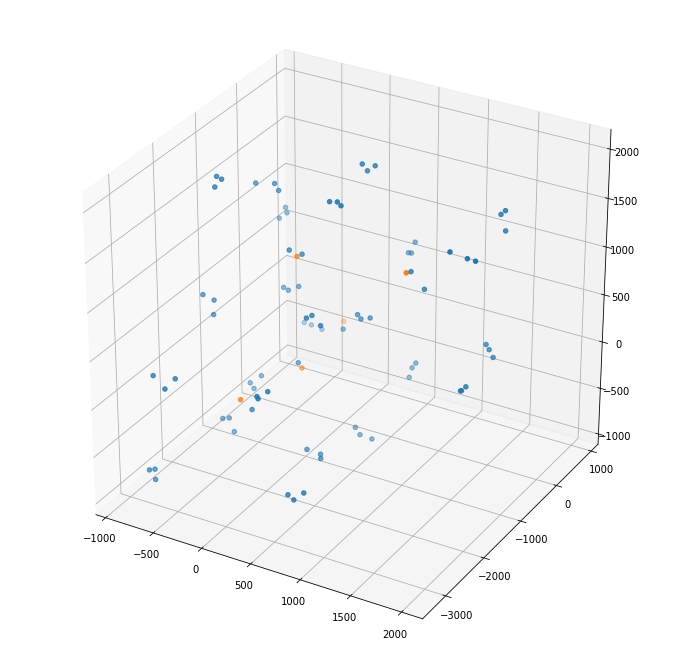

In [30]:
def display(beacons, sensors):
#inp_beacons[:,0]
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(beacons[:,0], beacons[:,1], beacons[:,2])
    ax.scatter(sensors[:,0], sensors[:,1], sensors[:,2])
    plt.show()
    
display(test_beacons, test_sensors)

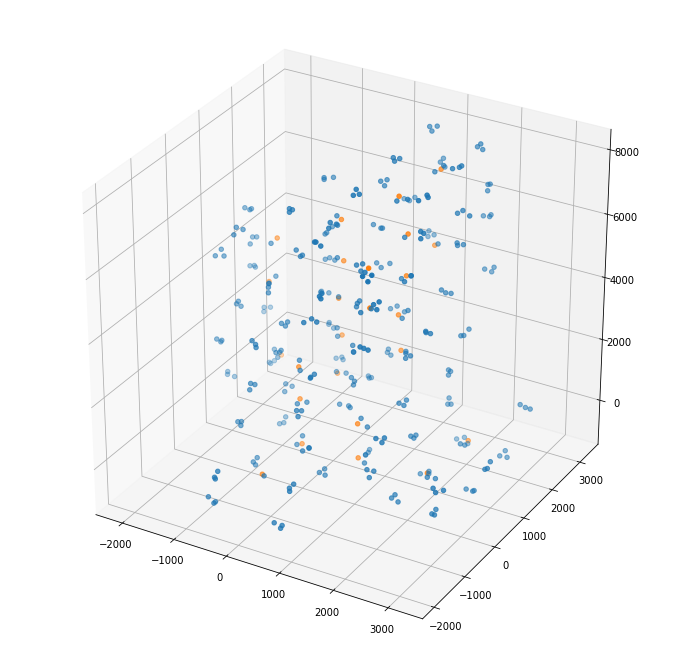

In [31]:
display(inp_beacons, inp_sensors)